# **Zadanie 1**
---

# Wprowadzenie
Generator ACORN (Additive Congruential Random Number) to rodzina generatorów liczb pseudolosowych oparta na ciagach rekurencyjnych. Rekurencja
w matematyce odnosi sie do definiowania sekwencji liczb, gdzie każda liczba
jest wyrażona za pomoca poprzednich liczb w ciagu. W tej sekcji przedstawimy
szczegółowy opis zmiennej oraz działania generatora ACORN.

# Zmienne Generatora ACORN  
* **N**: Liczba liczb pseudolosowych, które chcemy wygenerować.
* **k**: Rzad generatora ACORN, czyli liczba krok´ow wstecz, które są uwzględnione w każdym kolejnym kroku generacji.
* **M**: Moduł, który jest stosowany w operacji modulo w generacji kolejnych liczb pseudolosowych. 
    Dla efektywnego działania generatora powinien być duży
* **Lag**: Liczba początkowych wyrazów, które sa pomijane w wynikowym ciągu liczb pseudolosowych.  

# Działanie Generatora ACORN   
1. **Inicjalizacja ziarna**: Pierwszy element ciagu liczb pseudolosowych, $X^0_0$, jest inicjalizowany losowa wartością z przedziału od 1 do M − 1.
2. **Inicjalizacja pierwszych wartości dla $X^m_0$**: Dla $m\ne 0$, pierwsze wartości $X^m_0$ są ustawiane na zero.
3. **Generacja kolejnych liczb pseudolosowych**:
    * Dla każdego kroku generacji, zaczynając od 1 do N + Lag:
        - $X^0_n$ jest ustawiane na poprzednią wartość $X^0_{n-1}$.
        - Dla $m$ od 1 do $k, X^m_n$ jest obliczane jako suma poprzedniego $X$ dla tego samego $m$ oraz poprzedniego $X$ dla poprzedniego $m$, a następnie brane moulo $M$
4. **Normalizacja wartości**: Ostatecznie, ciąg $Y_n^k$ jest uzyskiwany przez podzielenie ostatniego kroku $X$ przez $M$, ignorując pierwsze Lag wartości.

    Generator ACORN działa na zasadzie generowania sekwencji liczb na podstawie
rekurencyjnych równań. Wybór odpowiednich wartości początkowych
oraz odpowiednie ustawienie $k$ i $M$ zapewniaja, że generator generuje ciąg liczb
pseudolosowych, który przypomina ciąg zmiennych losowych o rozkładzie jednostajnym
w zakresie (0, 1).
---

# Implementacja w python

* Implementacja bibliotek (potrzebnych dla całego pliku)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.special import lambertw
from scipy.stats import arcsine
from scipy.stats import norm
import ctypes
from memory_profiler import memory_usage


* Generowanie próbki z rozkładu jednostajnego

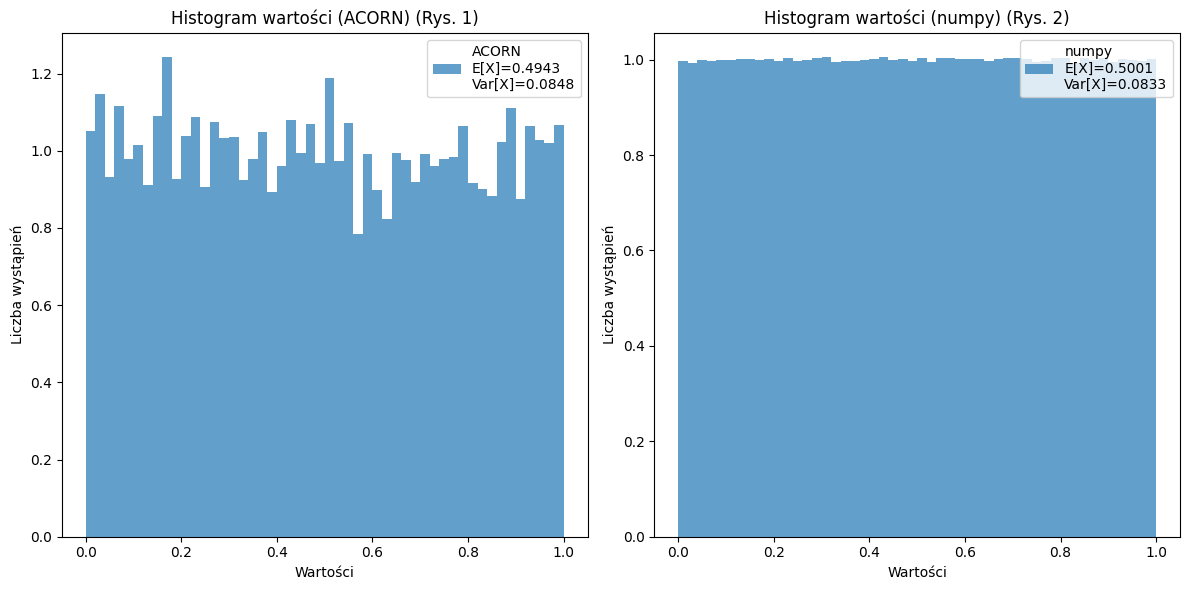

In [41]:
def generator_acorn(N, k, M, Lag):
    X = np.zeros((N + Lag, k + 1), dtype=np.int64) 
    X[0, 0] = np.random.randint(1, M, dtype=np.int64)  # Ziarno X0^0
    for m in range(1, k + 1):
        X[0, m] = 0  # Początkowe wartości dla X0^m, m != 0
    
    # Generowanie liczb ACORN z uwzględnieniem Lag
    for n in range(1, N + Lag):
        X[n, 0] = X[n-1, 0]  # Xn^0
        for m in range(1, k + 1):
            if n >= Lag:
                X[n, m] = (X[n-Lag, m] + X[n, m-1]) % M
            else:
                X[n, m] = (X[n-1, m] + X[n, m-1]) % M
    
    # Normalizacja wartości
    Y = X[Lag:, k] / M  # Pomijamy pierwsze Lag wartości
    return Y

# Parametry
k = 9
M = 2**29 - 1
Lag = 1000

# Długości prób
lengths = [5 * 10**3, 10**4, 5 * 10**4, 10**5, 5 * 10**5, 10**6, 5 * 10**6, 10**7] # , 5 * 10**7, 10**8
acorn_times = []
numpy_times = []

# Obliczanie wartości oczekiwanej i wariancji dla konkretnej próby
N = 5000000
liczby_losowe_acorn = generator_acorn(N, k, M, Lag)
liczby_losowe_numpy = np.random.uniform(0, 1, N)
mean_acorn = np.mean(liczby_losowe_acorn)
var_acorn = np.var(liczby_losowe_acorn)

mean_numpy = np.mean(liczby_losowe_numpy)
var_numpy = np.var(liczby_losowe_numpy)

# Histogramy wartości (ACORN vs numpy)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(liczby_losowe_acorn, bins=50, density=True, alpha=0.7, label=f'ACORN\nE[X]={mean_acorn:.4f}\nVar[X]={var_acorn:.4f}')
plt.title('Histogram wartości (ACORN) (Rys. 1)')
plt.xlabel('Wartości')
plt.ylabel('Liczba wystąpień')
plt.legend()
# plt.text(0.5, -1.2, 'Rys. 1', fontsize=12, ha='center')

plt.subplot(1, 2, 2)
plt.hist(liczby_losowe_numpy, bins=50, density=True, alpha=0.7, label=f'numpy\nE[X]={mean_numpy:.4f}\nVar[X]={var_numpy:.4f}')
plt.title('Histogram wartości (numpy) (Rys. 2)')
plt.xlabel('Wartości')
plt.ylabel('Liczba wystąpień')
plt.legend()
# plt.text(0.5, -1.2, 'Rys. 2', fontsize=12, ha='center')
plt.tight_layout()
plt.show()



* Pomiary czasu

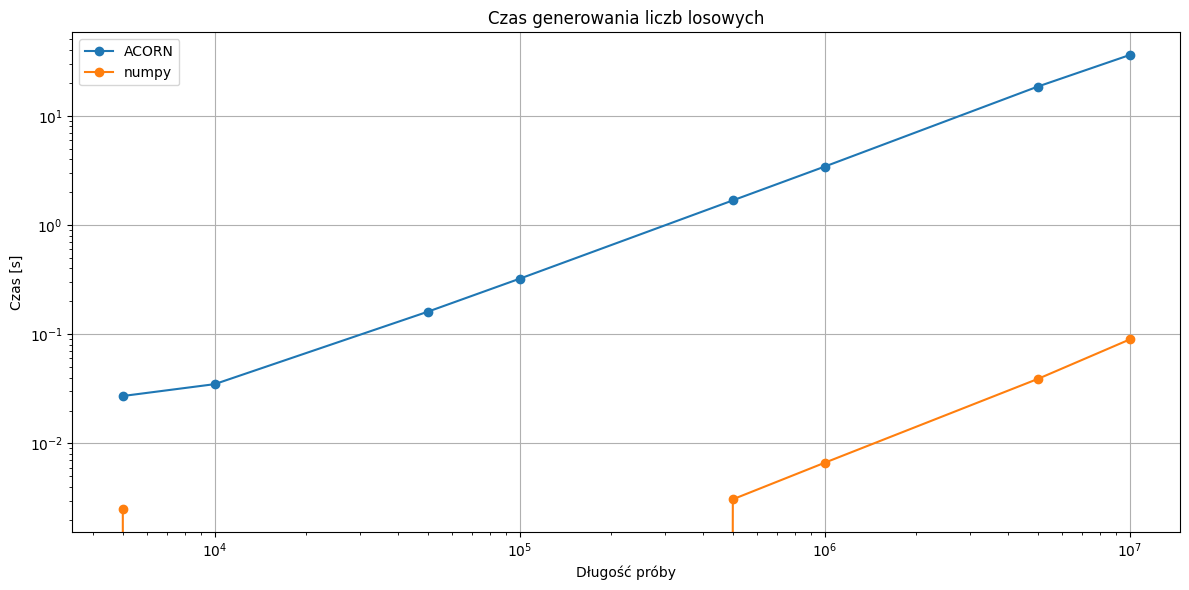

In [38]:
for N in lengths:
    # Generowanie liczb losowych za pomocą generatora ACORN
    start_time_acorn = time.time()
    liczby_losowe_acorn = generator_acorn(N, k, M, Lag)
    end_time_acorn = time.time()
    acorn_times.append(end_time_acorn - start_time_acorn)
    
    # Generowanie liczb losowych za pomocą numpy
    start_time_numpy = time.time()
    liczby_losowe_numpy = np.random.uniform(0, 1, N)
    end_time_numpy = time.time()
    numpy_times.append(end_time_numpy - start_time_numpy)

# Wykres czasu generowania
plt.figure(figsize=(12, 6))
plt.plot(lengths, acorn_times, label='ACORN', marker='o')
plt.plot(lengths, numpy_times, label='numpy', marker='o')
plt.title('Czas generowania liczb losowych')
plt.xlabel('Długość próby')
plt.ylabel('Czas [s]')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


---

# Analiza danych

- Wizualizacja i porównanie strukrur
    * **Rysunek 1**: zawiera prezentacje danych zar´owno w formie ciagu, jak i funkcji $Y_{n-1}^k \rightarrow Y^k_n$. Możemy zauważyć,
     że dane zgodnie z oczekiwaniami zawieraja sie w przedziale $[0,1]$.
    * **Rysunek 2**: zawiera histogram oraz podstawowe informacje na temat rozkładów, krtóre tworzą dane z obu metod. Jak możemy zauważyć dane z ACORN są   dużo bardziej ’rozrzucone’ od tych z numpy. Spowodowane to jest użyciem zmiennej Lag, która to pomija daną liczbe pooczątkowych wyrazów. Natomiast przy tak dużej ilości danych rozkłady empiryczne zachowuja
swoje własności tak więc wariancja jak i średnia niewiele róznią się od siebie.
- Porównanie wydajności obu metod
    Do porównania obu metod użyliśmy różnych rozmiarów dla prób zaczynających się od $5\cdot 10^3$ aż do  $10^7$. Metoda ACORN jest zauważalnie wolniejsza przy coraz to wiekszych ilościowo próbach. 



# Podsumowanie

Porównanie generatora ACORN z generatorem numpy wykazało, że generator
ACORN generuje ciągi pseudolosowe o podobnych właściwościach do wbudowanego
generatora numpy. Jednakże wydanjność generacji dla dużych długości
prób może być istotnie różna, zależnie od implementacji. Przeprowadzona analiza
wykazała, że wartości generowane przez ACORN maja rozkład zbliżony
do jednostajnego, co potwierdza jego poprawność i użyteczność w symulacjach.
Dla dalszej pracy zaleca sie implementacje generatora w sposób efektywny
pamięciowo oraz przeprowadzanie wielokrotnych symulacji dla oceny stabilności
wyników.

# **Zadanie 2**
---

# Wstęp
Celem zadania jest sprawdzenie 5 różnych metod generujących rozkład normalny $X \sim \mathcal{N}(\mu, \sigma^2)$ w tym przypadku $X \sim \mathcal{N}(0, 1)$. Pierwsze 3 metody zostały zaimplementowane z wykorzystaniem kodów przedstawianych w trakcie zajęć, są to metody: odwrotnej dystrybuanty, akceptacji odrzucenia, stosunków jenostajnych. Dwie kolejne metody "tuzina" oraz "zigguratu" zaimplementowane zostały ręcznie. Ostatnim krokiem jest porównanie wyżej wymienionych metod na podstawie: czasu działania algorytmu, zużycia pamięci oraz dokładności symulacji.

---


# Implementacja potrzebnych funckji

In [ ]:

def Theoretical_PDF(mu=0,sigma=1):
    sample_range = (mu-4*sigma,mu+4*sigma)
    xs = np.linspace(sample_range[0],sample_range[1],10000)
    ys = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(xs-mu)**2/sigma**2)
    return xs ,ys

x_t, y_t = Theoretical_PDF()

# Implementacja kodów z zajęć

* Zadanie 1 lista 2\
    Metoda odwróconej dystrybuanty generuje próbki z rozkładu prawdopodobieństwa, korzystając z funkcji odwrotnej dystrybuanty tego rozkładu. Najpierw losuje się wartość  $U\sim U(0,1)$ z jednorodnego rozkładu. Następnie oblicza się wartość funkcji odwrotnej dystrybuanty $F(u)=\Phi^{-1}(x)$ co daje próbkę z pożądanego rozkładu. Metoda ta jest bardzo efektywna, jeśli znana jest funkcja odwrotna dystrybuanty. Jest szczególnie przydatna w przypadku prostych rozkładów, takich jak rozkład normalny, wykładniczy, czy log-normalny.

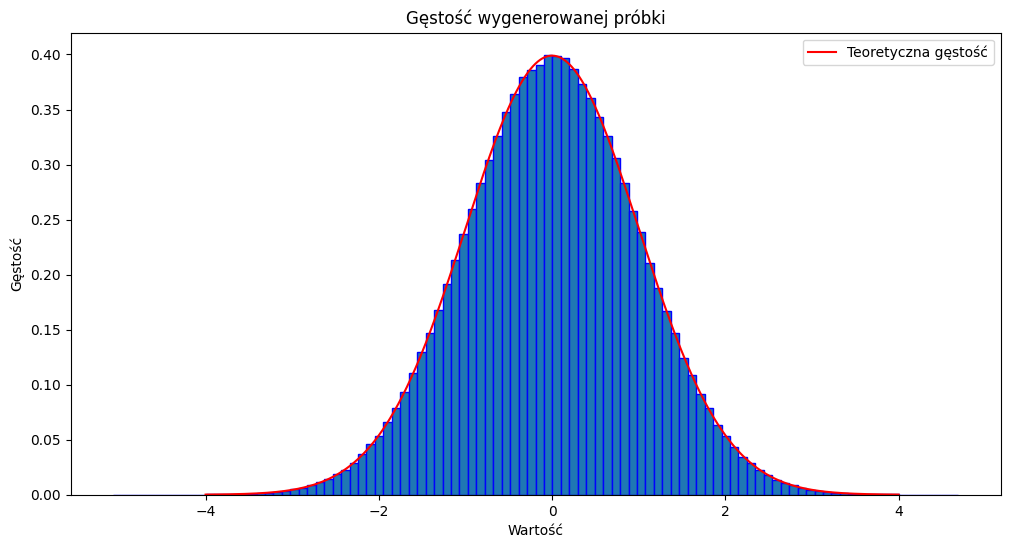

In [ ]:
class inverse_CDF():
    def __init__(self) -> None:
        pass

    def test(self,iterations,size):
        means = []
        variances = []
        for i in range(iterations):
            dane = self.generate_samples(size=size)
            means.append(np.mean(dane))
            variances.append(np.var(dane))
        return np.mean(means),np.mean(variances)
    
    def generate_samples(self,size=1e6, mu=0.0, sigma=1.0):
        """
        Generuje próbki z rozkładu noramlengo metodą odwróconej dystrubuanty.
        Args:
            size (int): Liczba próbek do wygenerowania (domyślnie 1e6).
            mu (float): Średnia rozkładu normalnego (domyslnie 0).
            sigma (float): Wariancja rozkładu normalnego (domyślnie 1).
        Returns:
            np.ndarray: Tablica próbek z rozkładu normalnego.
        """
        u = np.random.uniform(0, 1, size)
        z = norm.ppf(u, loc=mu, scale=sigma)
        return z

metoda = inverse_CDF()
dane = metoda.generate_samples(1000000)
# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.hist(dane,density=1,edgecolor='blue',bins=100)
plt.plot(x_t,y_t,label='Teoretyczna gęstość',color='r') 
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Gęstość wygenerowanej próbki')
plt.legend()
plt.show()

# print(metoda.test(100,1000000))

Kod implementujacy działa poprawnie. Histogram danych pokrywa się z dużą dokładnością do teoretycznej gęstości. Średnia i wariancja są rzędu $1\cdot 10^{-5}$. Wyniki są satysfakcjonujące.

* Zadanie 3 lista 3\
    Metoda akceptacji odrzucenia z wykorzystaniem rozkładu wykładniczego. Generuje próbki z pożądanego rozkładu, wykorzystując inny, łatwy do próbkowania rozkład pomocniczy. Wybiera się losowy punkt z rozkładu tutaj wykładniczego, a następnie sprawdza, czy punkt ten znajduje się poniżej krzywej gęstości pożądanego rozkładu. Jeśli tak, próbka jest akceptowana; w przeciwnym razie jest odrzucana. Proces ten jest powtarzany, aż uzyska się odpowiednią liczbę próbek. Metoda ta jest skuteczna dla rozkładów, które są trudne do próbkowania bezpośrednio, ale wymaga dobrze dobranego rozkładu pomocniczego, aby minimalizować liczbę odrzuconych próbek.

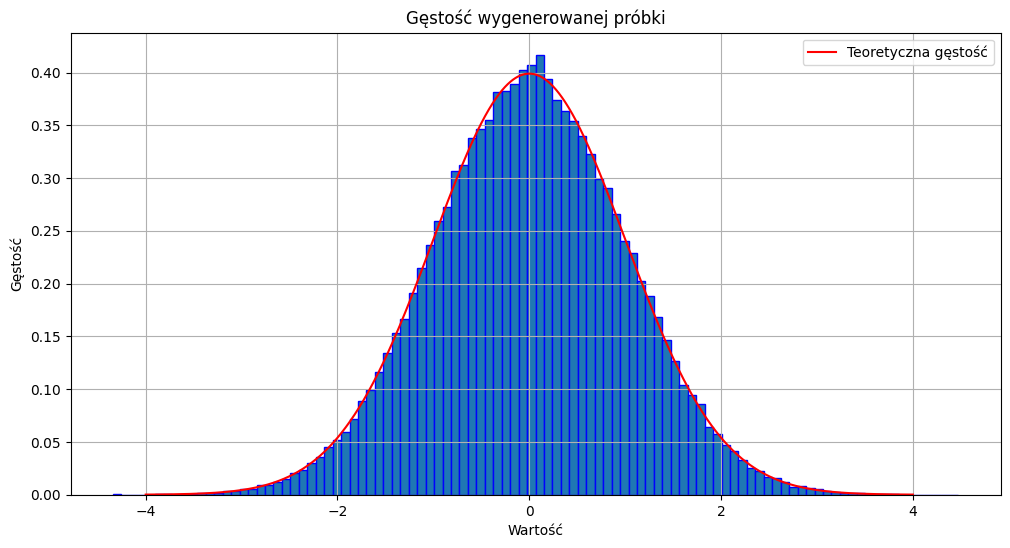

In [ ]:
class acaptnace():
    def __init__(self) -> None:
        pass
    def wykladniczy(self,beta=1, n=1000000):
        """
        Generuje próbki z rozkładu wykładniczego.
        Args:
            beta (float): Parametr skali rozkładu wykładniczego (domyślnie 1).
            n (int): Liczba próbek do wygenerowania (domyślnie 1e6).
        Returns:
            np.ndarray: Tablica próbek z rozkładu wykładniczego.
        """
        return np.random.default_rng().exponential(scale=beta, size=n)

    def generate_normal(self,n=1000000, beta=1):
        """
        Generuje próbki z rozkładu normalnego |N(0, 1)| przy użyciu metody akceptacji-odrzucania, zaczynając od rozkładu wykładniczego.
        Args:
            n (int): Liczba próbek do wygenerowania (domyślnie 1,000,000).
            beta (float): Parametr skali rozkładu wykładniczego (domyślnie 1).
        Returns:
            np.ndarray: Tablica próbek z rozkładu normalnego N(0, 1).
        """
        samples = []
        while len(samples) < n:
            x = self.wykladniczy(beta, n)
            u = np.random.uniform(0, 1, size=n)
            mask = u < np.exp(-0.5 * x**2 - 0.5 + x)
            samples.extend(x[mask])
        return np.array(samples)[:n]

    def generate_samples(self,n, mu=0, sigma=1, beta=1):
        """
        Generuje próbki z rozkładu normalnego N(mu, sigma) przy użyciu rozkładu wykładniczego i metody akceptacji-odrzucania.
        Args:
            n (int): Liczba próbek do wygenerowania.
            mu (float): Średnia rozkładu normalnego (domyślnie 0).
            sigma (float): Odchylenie standardowe rozkładu normalnego (domyślnie 1).
            beta (float): Parametr skali rozkładu wykładniczego (domyślnie 1).
        Returns:
            np.ndarray: Tablica próbek z rozkładu normalnego N(mu, sigma).
        """
        x = self.generate_normal(n, beta)
        for i in range(n):
            u = np.random.uniform(0, 1)
            j = (u > 0.5) * 2 - 1
            x[i] = x[i] * j
        x = x * sigma + mu
        return x
    
    def test(self,iterations,size):
        means = []
        variances = []
        for i in range(iterations):
            dane = self.generate_samples(n=size)
            means.append(np.mean(dane))
            variances.append(np.var(dane))
        return np.mean(means),np.mean(variances)
    
metoda = acaptnace()
dane = metoda.generate_samples(n=100000, mu=0, sigma=1, beta=1)
# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.hist(dane,density=1,edgecolor='blue',bins=100)
plt.plot(x_t,y_t,label='Teoretyczna gęstość',color='r')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Gęstość wygenerowanej próbki')
plt.legend()
plt.grid(True)
plt.show()

# print(metoda.test(100,1_000_000))

Generowany rozkład normalny wygląda na mniej dokładny niż wygenerowany we wcześniejszym zadaniu natomiast dalej pokrywa się w wiekszości. Większy błąd średniej oraz wariancji rzędu $1\cdot 10^{-3}$ jest widoczny. 

* Zadanie 2 lista\
Metoda stosunków jednostajnych generuje próbki z rozkładu normalnego, wykorzystując dwa losowe punkty o jednostajnym rozkładzie. Wybiera losowy punkt z kwadratu, a następnie sprawdza, czy punkt ten mieści się w obrębie jednostajnej funkcji gęstości rozkładu. Próbki, które znajdują się wewnątrz tej funkcji, są akceptowane, a te, które są poza, są odrzucane. Dzięki temu metoda jest prosta, ale ma niską wydajność, ponieważ wiele próbek jest odrzucanych. Stosowana jest głównie do szybkiego generowania danych do analizy, gdy precyzja nie jest kluczowa.

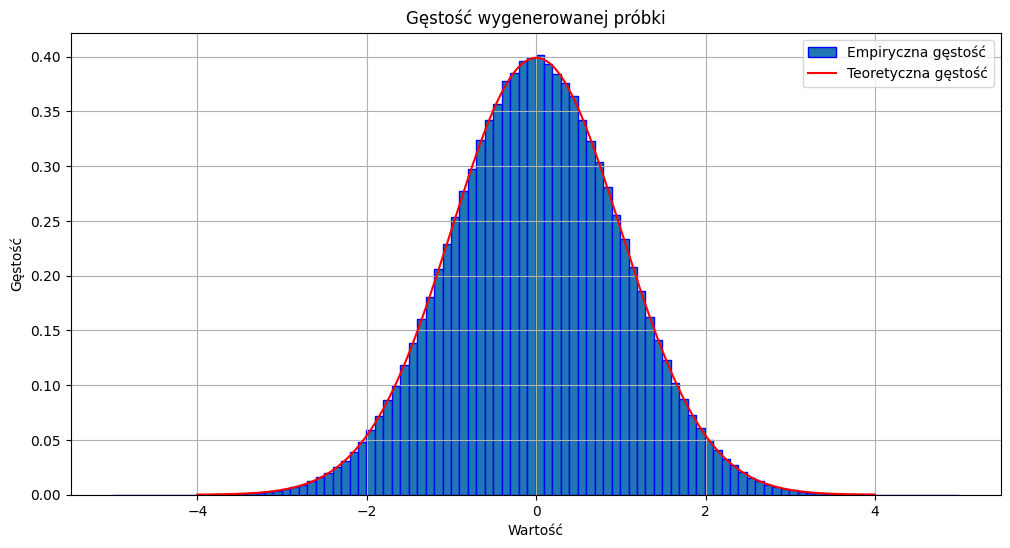

In [42]:
class uniform_relations():
    def __init__(self) -> None:
        pass
    # Define the function to calculate the upper boundary of y
    def func(self,x):
        return 2 * x * np.sqrt(-np.log(x))

    def generate_samples(self,size):
        # Generate x values from 0.01 to 1 with 400 points
        x = np.linspace(0.01, 1, 1000)

        # Calculate the corresponding y values (upper boundary)
        y_upper = self.func(x)

        # Initialize an empty list to store generated samples
        zs = []

        # Maximum y value from the function for rejection sampling
        y_max = self.func(np.exp(-0.5))

        # Set the desired number of samples to 1 million
        num_samples = size

        # Generate samples using rejection sampling
        while len(zs) < num_samples:
            val_x = np.random.uniform(0, 1)  # Random x from uniform distribution
            closest_index = np.abs(x - val_x).argmin()  # Find the closest x in the precomputed array
            val_y = np.random.uniform(-y_max, y_max)  # Random y from uniform distribution within -y_max and y_max
            if np.abs(val_y) <= y_upper[closest_index]:  # Accept the sample if within the upper boundary
                z = val_y / val_x  # Compute z = y / x
                zs.append(z)  # Append the sample to the list

        return np.array(zs)
    
    
    def test(self,iterations,size):
        means = []
        variances = []
        for i in range(iterations):
            dane = self.generate_samples(size=size)
            means.append(np.mean(dane))
            variances.append(np.var(dane))
        return np.mean(means),np.mean(variances)


metoda = uniform_relations()
# Convert the list of samples to a NumPy array
dane = metoda.generate_samples(int(1e6))

# Apply the 5-sigma rule: keep only values within [-5, 5]
filtered_sample = dane[np.abs(dane) <= 5]
# Rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.hist(filtered_sample, bins=100, density=1, edgecolor='blue', label='Empiryczna gęstość')
plt.plot(x_t, y_t, color='red', label='Teoretyczna gęstość')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Gęstość wygenerowanej próbki')
plt.legend()
plt.grid(True)
plt.show()

# print(metoda.test(100,1000000))


Próbki w tym przypadku nie są generowane dokładnie. Przy dużych rozmiarach danych pojawiają się wyniki wychodzące daleko poza $5\cdot \sigma$ (typu $400\cdot \sigma$), co srpawia że z wyasymilowanej próbki zostają odcięte pewne wartości a wariancja jest absurdalnie duża przekraczająca tysiąc, średnia pozostaje względnie dobrze estymowana z błedem na poziomie $1\cdot10^{-3}$ . Średnio z próbki o długości $1\cdot 10^6$ usuwanych jest $\sim 0.03\%$ wartości.

# Własnoręczne zaimplementowanie metod tuzinu i zigguratu

* Metoda tuzina\
    polega na wygenerowaniu 12 próbek z rozkładu jenostajnego po czym odjęciu od nich 6 a na koniec przemnożeniu próbki przez wariancje oraz dodanie średniej weług wzoru.
    Niech $U_i$ to będą pseudolosowe liczby z rozkładu $U\sim U(0,1)$
    1. $S=\sum^{12}_{i=1}U_i$
    2. $X = S-6$
    3. $N = \sigma X + \mu$

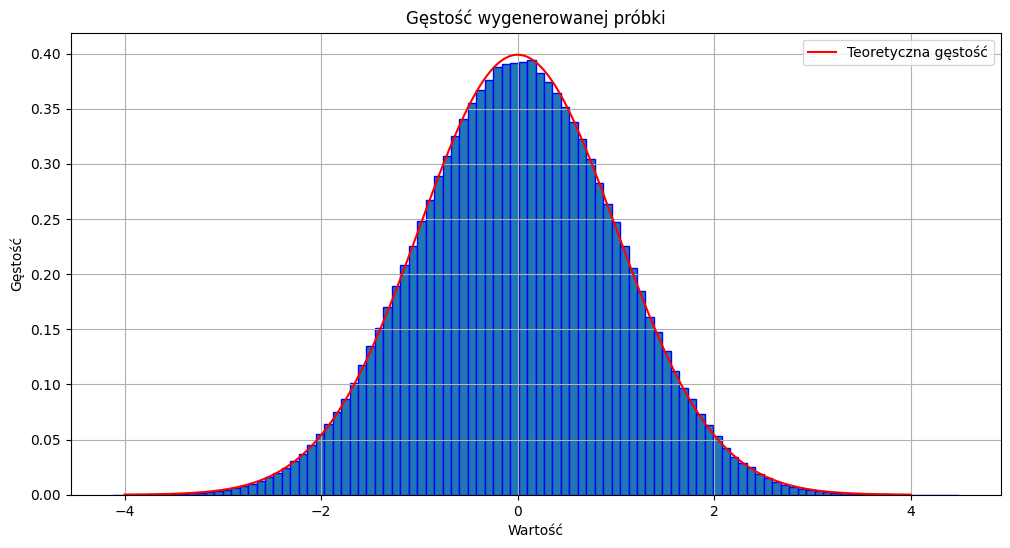

In [ ]:
class tuzin():
    """
    Klasa generująca próbki z rozkładu normalnego za pomocą metody sumy dwunastu jednostajnych (tzw. metoda tuzina).

    Metoda ta polega na generowaniu 12 liczb losowych z rozkładu jednostajnego, sumowaniu ich,
    a następnie normalizowaniu, co zgodnie z centralnym twierdzeniem granicznym daje próbki z rozkładu normalnego.
    """

    def __init__(self) -> None:
        """
        Inicjalizator klasy.
        """
        pass

    def generate_samples(self, n=int(1e6), m=0, s=1):
        """ 
        Args:
            n (int): Liczba próbek do wygenerowania (domyślnie 1e6).
            m (float): Średnia rozkładu normalnego (domyślnie 0).
            s (float): Odchylenie standardowe rozkładu normalnego (domyślnie 1).

        Returns:
            np.ndarray: Tablica próbek z rozkładu normalnego.
        """
        N = []
        for i in range(n):
            # Generowanie 12 liczb losowych z rozkładu jednostajnego U(0, 1)
            U = np.random.uniform(0, 1, 12)
            # Sumowanie 12 liczb i odejmowanie 6, co prowadzi do rozkładu normalnego ze średnią 0 i odchyleniem standardowym bliskim 1
            X = np.sum(U) - 6
            # Normalizacja próbek, aby miały zadane odchylenie standardowe s i średnią m
            N.append(s * X + m)
        return np.array(N)
    
    
    def test(self,iterations,size):
        means = []
        variances = []
        for i in range(iterations):
            dane = self.generate_samples(n=size)
            means.append(np.mean(dane))
            variances.append(np.var(dane))
        return np.mean(means),np.mean(variances)

# Tworzenie instancji klasy Tuzin
metoda = tuzin()

# Generowanie próbek z rozkładu normalnego
n_samples = int(1e6)  # Liczba próbek
m = 0  # Średnia
s = 1  # Odchylenie standardowe
standard_normal_samples_tuzin = metoda.generate_samples(n_samples, m, s)

# Rysowanie wykresu histogramu wygenerowanych próbek
plt.figure(figsize=(12, 6))
plt.hist(standard_normal_samples_tuzin, density=1, edgecolor='b', bins=100)

# Dodanie teoretycznej krzywej gęstości rozkładu normalnego do wykresu
plt.plot(x_t, y_t, color='red', label='Teoretyczna gęstość')

# Opisy osi i tytuł wykresu
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Gęstość wygenerowanej próbki')
plt.legend()
plt.grid(True)
plt.show()

# print(metoda.test(100,1000000))

Wyliczone estymatory są raczje dobre, wyróżnia się tutaj średnia z błedem na poiomie $\sim 1\cdot10^{-4}$ wariancja z kolei odstaje z błedem $1\cdot 10^{-3}$. Znacznie leprzy wynik niż poprzedni.

* Metoda ziggurat\
    Dzieli funkcję gęstości rozkładu na prostokątne warstwy o równych powierzchniach, umożliwiając szybkie generowanie próbek poprzez losowanie punktów w tych warstwach. Z centralnych warstw rozkładu generuje się większość próbek, co zwiększa efektywność. Aby ją zastosować, należy podzielić funkcję gęstości na warstwy, a następnie losować i sprawdzać punkty pod kątem zgodności z rozkładem. Metoda ta minimalizuje liczbę odrzuconych próbek, co przyspiesza generowanie danych.

C:\Users\kacpu\AppData\Local\Temp\ipykernel_18124\307977681.py:70: RuntimeWarning: overflow encountered in scalar negative
  return 0.5 * (1.0 + new_jsr / -np.power(2, 31)), new_jsr


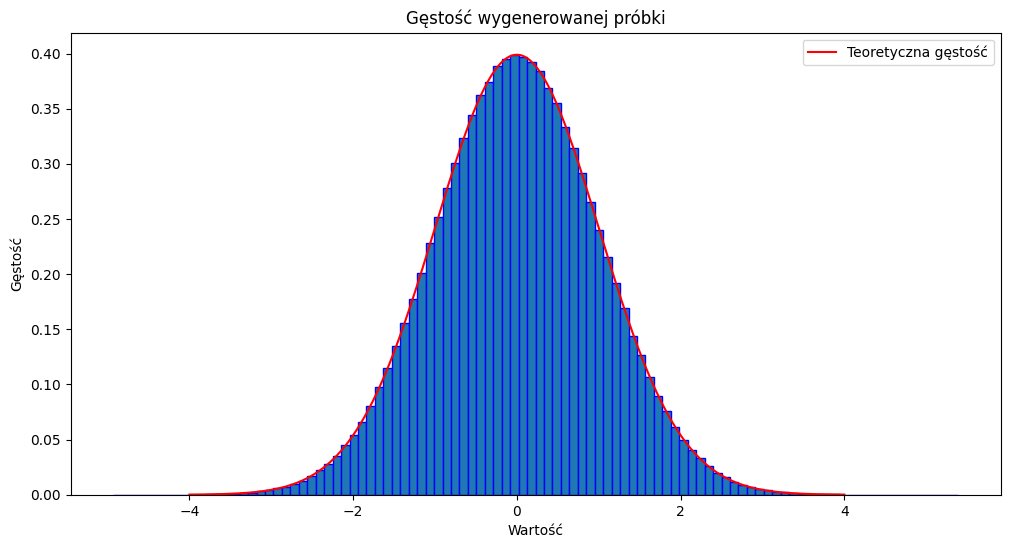

In [ ]:
class ziggurat():
    """
    Klasa generująca próbki z rozkładu normalnego za pomocą metody Ziggurata.

    Metoda Ziggurata wykorzystuje tablicę prefiksów i podejście oparte na odrzuceniu.
    """

    def __init__(self, mean=0.0, std=1.0, seed=37):
        """
        Inicjalizuje generator próbek z rozkładu normalnego.

        Args:
            mean (float): Średnia rozkładu normalnego (domyślnie 0.0).
            std (float): Odchylenie standardowe rozkładu normalnego (domyślnie 1.0).
            seed (int): Ziarno losowości (domyślnie 37).
        """
        self.mean = mean
        self.std = std
        self.seed = seed

    def _rshift(self, val, n):
        """
        Przesuwa wartość val o n bitów w prawo, z uwzględnieniem znaku.

        Args:
            val: Wartość do przesunięcia.
            n (int): Liczba bitów o które przesunięto.

        Returns:
            Przesunięta wartość.
        """
        if val >= 0:
            return ctypes.c_int(val >> n).value
        else:
            return ctypes.c_int((val + 0x100000000) >> n).value

    def _shr3(self, jsr):
        """
        Implementuje algorytm SHR3.

        Args:
            jsr (int): Stan generatora liczb losowych.

        Returns:
            Nowy stan generatora oraz wygenerowaną liczbę losową.
        """
        jzr = jsr
        jzr = ctypes.c_int(jzr ^ (jzr << 13)).value
        jzr = ctypes.c_int(jzr ^ self._rshift(jzr, 17)).value
        jzr = ctypes.c_int(jzr ^ (jzr << 5)).value
        return ctypes.c_int((jsr + jzr) | 0).value, jzr

    def _uni(self, jsr):
        """
        Generuje losową liczbę z rozkładu jednostajnego na przedziale (0, 1).

        Args:
            jsr (int): Stan generatora liczb losowych.

        Returns:
            Wygenerowana liczba oraz nowy stan generatora.
        """
        jsr, new_jsr = self._shr3(jsr)
        return 0.5 * (1.0 + new_jsr / -np.power(2, 31)), new_jsr

    def _uni_safe(self, jsr):
        """
        Generuje bezpieczną losową liczbę z rozkładu jednostajnego, eliminując wartości bliskie zeru.

        Args:
            jsr (int): Stan generatora liczb losowych.

        Returns:
            Bezpieczna liczba oraz nowy stan generatora.
        """
        while True:
            u, jsr = self._uni(jsr)
            if 0 != u:
                return u, jsr

    def _nfix(self, hz, iz, wn, fn, kn, jsr):
        """
        Naprawia losową liczbę z rozkładu jednostajnego zgodnie z algorytmem Ziggurata.

        Args:
            hz (int): Stan generatora liczb losowych.
            iz (int): Indeks w tablicy prefiksów.
            wn (np.ndarray): Tablica prefiksów.
            fn (np.ndarray): Tablica wartości funkcji rozkładu.
            kn (np.ndarray): Tablica granic przedziałów.
            jsr (int): Stan generatora liczb losowych.

        Returns:
            Wygenerowana liczba oraz nowy stan generatora.
        """
        r = 3.442619855899
        r1 = 1.0 / r
        x = 0
        y = 0

        while True:
            x = hz * wn[iz]
            if iz == 0:
                x = -np.log(self._uni_safe(jsr)[0]) * r1
                y = -np.log(self._uni_safe(jsr)[0])

                while True:
                    x = -np.log(self._uni_safe(jsr)[0]) * r1
                    y = -np.log(self._uni_safe(jsr)[0])
                    if y + y >= x * x:
                        break
                return (r + x if hz > 0 else -r - x), jsr

            if fn[iz] + self._uni(jsr)[0] * (fn[iz - 1] - fn[iz]) < np.exp(-0.5 * x * x):
                return x, jsr

            hz, jsr = self._shr3(jsr)
            iz = hz & 127

            if np.abs(hz) < kn[iz]:
                return hz * wn[iz], jsr

    def generate_samples(self, size=10000):
        """
        Generuje próbki z rozkładu normalnego za pomocą metody Ziggurata.

        Args:
            size (int): Liczba próbek do wygenerowania (domyślnie 10000).

        Returns:
            np.ndarray: Tablica próbek z rozkładu normalnego.
        """
        wn = np.array([0.0 for _ in range(128)], dtype=np.float64)
        fn = np.array([0.0 for _ in range(128)], dtype=np.float64)
        kn = np.array([0.0 for _ in range(128)], dtype=np.float64)

        jsr = 123456789 ^ (self.seed if self.seed is not None else int(time.time()))

        m1 = 2147483648.0
        dn = 3.442619855899
        tn = dn
        vn = 9.91256303526217e-3

        q = vn / np.exp(-0.5 * dn * dn)
        kn[0] = np.floor((dn / q) * m1)
        kn[1] = 0

        wn[0] = q / m1
        wn[127] = dn / m1

        fn[0] = 1.0
        fn[127] = np.exp(-0.5 * dn * dn)

        i = 126
        while i >= 1:
            dn = np.sqrt(-2.0 * np.log(vn / dn + np.exp(-0.5 * dn * dn)))
            kn[i + 1] = np.floor((dn / tn) * m1)
            tn = dn
            fn[i] = np.exp(-0.5 * dn * dn)
            wn[i] = dn / m1

            i -= 1

        samples = []
        for _ in range(size):
            hz, jsr = self._shr3(jsr)
            iz = hz & 127
            sample, jsr = (hz * wn[iz], jsr) if np.abs(hz) < kn[iz] else self._nfix(hz, iz, wn, fn, kn, jsr)
            samples.append(self.mean + self.std * sample)
        return samples

    
    def test(self,iterations,size):
        means = []
        variances = []
        for i in range(iterations):
            dane = self.generate_samples(size=size)
            means.append(np.mean(dane))
            variances.append(np.var(dane))
        return np.mean(means),np.mean(variances)
# Użycie klasy Ziggurat do generowania próbek
metoda = ziggurat()
ziggurat_samples = metoda.generate_samples(size=1000000)

# Wyświetlenie histogramu
plt.figure(figsize=(12, 6))
plt.hist(ziggurat_samples, bins=100, density=True, edgecolor="b")
plt.plot(x_t,y_t,label='Teoretyczna gęstość',color='r')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.title('Gęstość wygenerowanej próbki')
plt.legend()
plt.show()

# print(metoda.test(100,1000000))

Ta mtoda była w stanie generować jedne z najbardziej dokładnych histogramów, przkłada się to na dokładnośc obu estymatorów. Błedy wynoszą $\sim 1\cdot 10^{-4}$

# Test różnych generatorów
---

* Test czasowy\
    W celu analizy czasowej różnych metod zaprogramowana została funkcja mierząca różnicę czasu między wywołaniem a zakończeniem działania każdej z funkcji. zrobione to zostało dzięki sprowadzeniu kazdej metody do swojej klasy. Czasy zostały zmierzone na danych rozpinających sie od $1\cot 10^5$ do $1\cdot 10^6$ ze skokiem o $1\cdot 10^5$, przy każym rozmiarze danych powtórzono test $10$-krotnie wyliczając średnią.

C:\Users\kacpu\AppData\Local\Temp\ipykernel_18124\307977681.py:70: RuntimeWarning: overflow encountered in scalar negative
  return 0.5 * (1.0 + new_jsr / -np.power(2, 31)), new_jsr


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


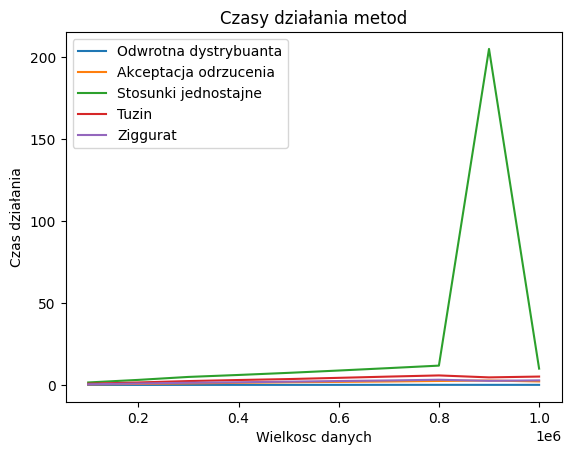

In [ ]:
def measure_execution_time(size, class_type):
    total_time = 0
    iterations = 10

    if class_type == 1:
        obj = inverse_CDF()
    elif class_type == 2:
        obj = acaptnace()
    elif class_type == 3:
        obj = uniform_relations()
    elif class_type == 4:
        obj = tuzin()
    elif class_type == 5:
        obj = ziggurat()
    else:
        raise ValueError("Invalid class type provided")

    for _ in range(iterations):
        start_time = time.time()
        d = obj.generate_samples(size)
        end_time = time.time()
        total_time += end_time - start_time

    total_time /= iterations

    return total_time

N = np.arange(int(1e5),int(1e6)+1,int(1e5))
times_1 = []
times_2 = []
times_3 = []
times_4 = []
times_5 = []

for n in N:
    times_1.append(measure_execution_time(n,1))
    times_2.append(measure_execution_time(n,2))
    times_3.append(measure_execution_time(n,3))
    times_4.append(measure_execution_time(n,4))
    times_5.append(measure_execution_time(n,5))

plt.figure(figsize=(14, 8))
plt.plot(N,times_1,label='Odwrotna dystrybuanta')
plt.plot(N,times_2,label='Akceptacja odrzucenia')
plt.plot(N,times_3,label='Stosunki jednostajne')
plt.plot(N,times_4,label='Tuzin')
plt.plot(N,times_5,label='Ziggurat')
plt.ylabel("Czas działania")
plt.xlabel("Wielkosc danych")
plt.title("Czasy działania metod")
plt.legend()

Widoczny wykres jednoznacznie wskazuje, że każda metoda ma charakter liniowy $O(n)$. Najlepiej wypadły metody: a najgorzej 

* Test zużycia pamięci\
    Nie rózni się znacząco od poprzedniego, funkcja działa tak samo lecz liczy zużycie pamięci.

C:\Users\kacpu\AppData\Local\Temp\ipykernel_18124\307977681.py:70: RuntimeWarning: overflow encountered in scalar negative
  return 0.5 * (1.0 + new_jsr / -np.power(2, 31)), new_jsr


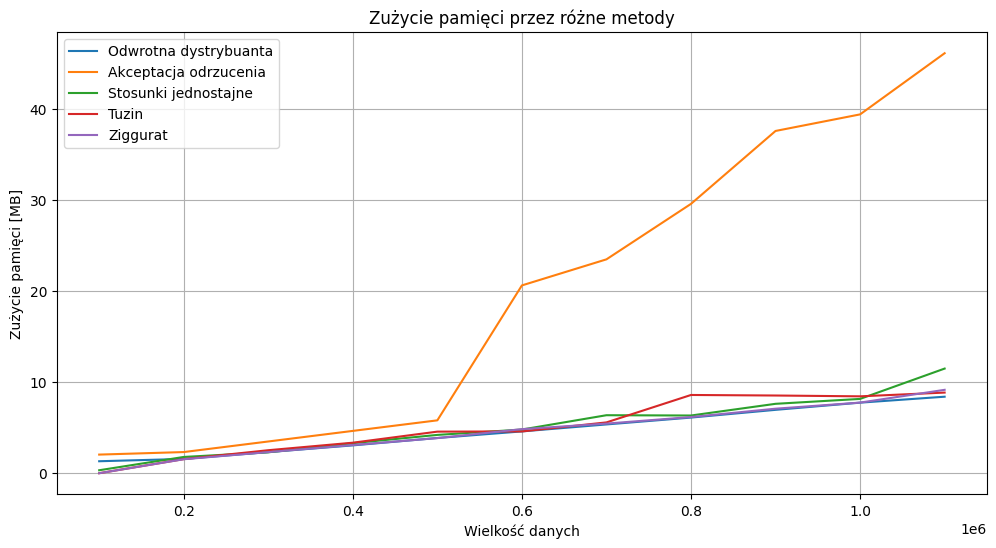

In [ ]:
def measure_memory_usage(size, class_type):
    """
    Mierzy zużycie pamięci przez funkcję generującą próbki dla zadanej klasy.

    Args:
        size (int): Wielkość generowanych danych.
        class_type (int): Typ klasy (1-5).

    Returns:
        list: Lista zużycia pamięci dla każdego wywołania.
    """
    memories = []
    iterations = 10

    # Inicjalizacja obiektu na podstawie class_type
    if class_type == 1:
        obj = inverse_CDF()
    elif class_type == 2:
        obj = acaptnace()
    elif class_type == 3:
        obj = uniform_relations()
    elif class_type == 4:
        obj = tuzin()
    elif class_type == 5:
        obj = ziggurat()
    else:
        raise ValueError("Invalid class type provided")

    # Mierzenie zużycia pamięci dla 10 iteracji
    for _ in range(iterations):
        mem_usage = memory_usage((obj.generate_samples, (size,)), max_iterations=1)
        memories.append(max(mem_usage) - min(mem_usage))

    return memories

# Zakresy rozmiarów danych
N = np.arange(int(1e5), int(1e6) + int(1e5)+1, int(1e5))

# Wyniki
results = {1: [], 2: [], 3: [], 4: [], 5: []}

# Zbieranie danych
for n in N:
    for class_type in range(1, 6):
        results[class_type].append(measure_memory_usage(n, class_type))

# Rysowanie wykresów
plt.figure(figsize=(12, 6))

# Iteracja przez typy klas i rysowanie wyników zużycia pamięci
for class_type, label in zip(range(1, 6), [
        'Odwrotna dystrybuanta', 
        'Akceptacja odrzucenia', 
        'Stosunki jednostajne', 
        'Tuzin', 
        'Ziggurat']):
    memories = [np.mean(result) for result in results[class_type]]  # Średnie zużycie pamięci dla każdej klasy
    plt.plot(N, memories, label=label)

plt.ylabel("Zużycie pamięci [MB]")
plt.xlabel("Wielkość danych")
plt.title("Zużycie pamięci przez różne metody")
plt.legend()
plt.grid(True)
plt.show()

Zużycie pamięci systemu jest trudne pomiary przez ograniczenie systemu winows natomiast możemy wyróżnić metodę akceptacji odrzucenie co nie dziwi nas biorąc pod uwagę odrzucanie nieudanych prób. Pozostałe metody trzymaja sie blisko siebie jednak widoczne jest odstepstwo metody stosunków oraz tuzina. Na uwagę zasługują metoda zigguratu oraz odwróconej dystrybuanty mające najmniejsze zużycie pamięci.

---
# Podsumowanie

W zadaniu zostały porównane rózne metody generujące rozkład standardowy normalny. Każda z nich jest ma swoje zalety i way w zależności od kryterium oceny. Najlepszymi algorytmami według rankingu i przypisywanych im ocen są algorytmy: odwrotnej dystrybuanty, ziggurat, tuzin, akceptacji odrzucenia, stosunkow jednostajncyh. Szególnie odznacza się metoda odwrotnej dystrybuanty uzyskujac najlepsze wyniki wszędzie. Metoda akceptacji ma dużą dokładność, a ziggurat małe zużycie pamięci i dużą szybkość, jednak dokładnośc nieustępuje metodzie tuzina, który jest gorszy na wscześniej wymienionych polach.

# **Zadanie 3**
---


# Wprowadzenie
Metody Monte Carlo są potężnym narzędziem w numerycznej analizie całek, zwłaszcza w przypadkach, gdy tradycyjne metody całkowania są nieefektywne lub niemożliwe do zastosowania. Jednakże, podstawowa metoda Monte Carlo może wymagać dużej liczby próbek, aby uzyskać dokładne wyniki. W celu poprawy efektywności tych metod stosuje się techniki redukcji wariancji.

W tym artykule skupimy się na dwóch metodach redukcji wariancji: metodzie odbić lustrzanych (antithetic variates) i metodzie zmiennej kontrolnej (control variates). Zastosujemy te metody do oszacowania wartości $\pi$ poprzez całkowanie funkcji $f(x) = \frac{4}{1+x^2}$ na przedzile $[0,1]$

# Opis Metod
* **Podstawowa metoda Monte Carlo**
W postawowej metodzie Monte Carlo, całkę oblicza się jako:
$$I = \int^1_0 f(x)dx\approx \frac{1}{N} \sum^N_{i=1} f(X_i),$$
gdzie $X_i$ są niezależnymi, równomiernie rozłozonymi zmiennymi losowymi na przedziale $[0,1].$
* **Metoda odbić lustrzanych**
Ta metoda wykorzystuje fakt, że dla funkcji $f(x)$ symetrycznej względem $x=0,5$ na $[0,1]$,próbki $x$ i $1-x$ daje te same wartości funkcji. Generując pary $(x,1-x)$, redukujemy wariancje estymatora:
$$I \approx \frac{1}{2N} \sum^N_{i=1} (f(X_i)+f(1-X_i)).$$
* **Metoda zmiennej kontrolowanej**
Ta metoda wykorzystuje korelacje między estymowaną funkcją $f(x)$ a funkcją kontrolną $g(x)$, której całka jest znana. Estymator z redukcją wariancji przyjmuje postać:
$$I\approx \frac{1}{N}\sum^N_{i=1} (f(X_i)-\beta(g(X_i)-E[g(X_i)])) + \beta \int^1_0 g(x)dx,$$
gdzie $\beta$ jest współczynnikiem minimalizującym wariancje.

---

# Implementacja w python

* Implementacja potrzebnych funkcji

In [43]:
# Metoda podstawowa Monte Carlo
def monte_carlo_estimate(n):
    samples = np.random.uniform(0, 1, n)
    f_values = 4 / (1 + samples**2)
    return np.mean(f_values)

# Metoda oceny antitetycznej
def antithetic_estimate(n):
    samples = np.random.uniform(0, 1, n // 2)
    antithetic_samples = 1 - samples
    f_values = 4 / (1 + samples**2)
    antithetic_f_values = 4 / (1 + antithetic_samples**2)
    combined_f_values = np.concatenate((f_values, antithetic_f_values))
    return np.mean(combined_f_values)

# Metoda zmiennej kontrolnej
def control_variate_estimate(n):
    samples = np.random.uniform(0, 1, n)
    control_variate = samples
    f_values = 4 / (1 + samples**2)
    control_mean = 0.5
    cov_xy = np.cov(f_values, control_variate, bias=True)[0, 1]
    var_y = np.var(control_variate)
    beta = cov_xy / var_y
    adjusted_f_values = f_values - beta * (control_variate - control_mean)
    return np.mean(adjusted_f_values)

* Obliczenia i wykres

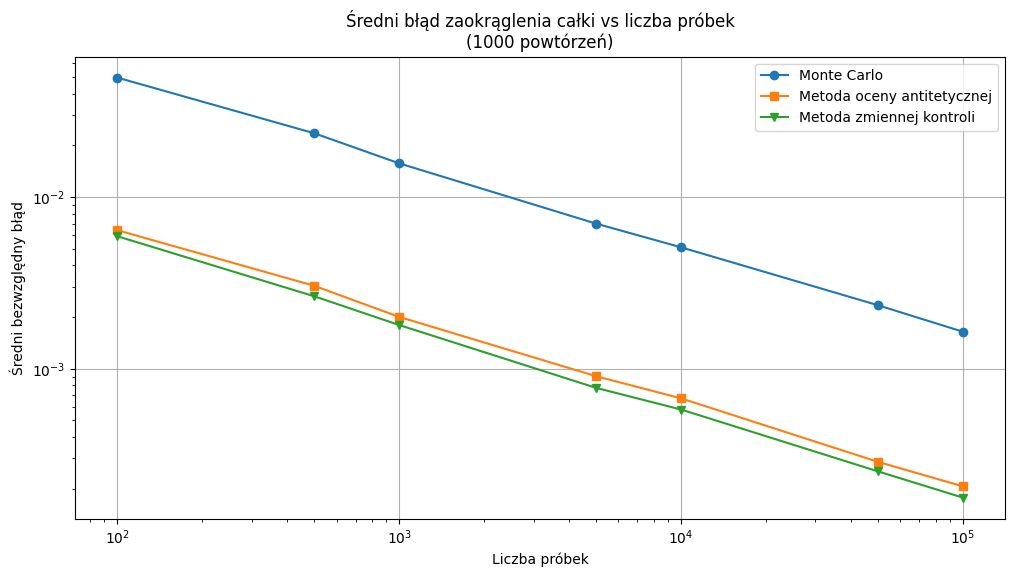

In [45]:
# Prawdziwa wartość całki dla porównania
true_value = np.pi

# Różne liczby próbek
sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Liczba powtórzeń dla każdej symulacji
num_repetitions = 1000

# Funkcja do obliczenia średniego błędu
def calculate_average_error(estimate_func, sample_size, repetitions):
    errors = [np.abs(estimate_func(sample_size) - true_value) for _ in range(repetitions)]
    return np.mean(errors)

# Średnie błędy dla każdej metody i rozmiaru próbki
mc_avg_errors = [calculate_average_error(monte_carlo_estimate, n, num_repetitions) for n in sample_sizes]
antithetic_avg_errors = [calculate_average_error(antithetic_estimate, n, num_repetitions) for n in sample_sizes]
control_variate_avg_errors = [calculate_average_error(control_variate_estimate, n, num_repetitions) for n in sample_sizes]

# Wykresy średnich błędów względem liczby próbek
plt.figure(figsize=(12, 6))
plt.loglog(sample_sizes, mc_avg_errors, label='Monte Carlo', marker='o')
plt.loglog(sample_sizes, antithetic_avg_errors, label='Metoda oceny antitetycznej', marker='s')
plt.loglog(sample_sizes, control_variate_avg_errors, label='Metoda zmiennej kontroli', marker='v')
plt.xlabel('Liczba próbek')
plt.ylabel('Średni bezwzględny błąd')
plt.title('Średni błąd zaokrąglenia całki vs liczba próbek\n(1000 powtórzeń)')
plt.legend()
plt.grid(True)
plt.show()

---

# Wnioski
Na podstawie analizy danych możemy wyciągnąć następujące wnioski:
1. Wszystkie trzy metody wykazują spadek błędu wraz ze wzrostem liczby próbek, co jest zgodne z teorią metod Monte Carlo.
2. Metoda odbić lustrzanych wykazuje mniejszy błąd niż podstawowa metoda Monte Carlo dla tej samej liczby próbek. Jest to spodziewane, ponieważ wykorzystujemy symetrię funkcji $f(x)$
3. Metoda zmiennej kontrolnej daje najlepsze wyniki, szczególnie dla mniejszych rozmiarów próbek. Wynika to z silnej korelacji między $f(x)$ a funkcją kontrolna $x$
4. Dla dużych rozmiarów próbek ($\ >50,000$) różnice między metodami stają się mniej wyraźne, co sugeruje, że korzyści z redukcji wariancji są najbardziej zauważalne przy mniejszych próbkach.

Podsumowując, metody redukcji wariancji, takie jak odbicia lustrzane i zmienna kontrolna, mogą znacznie poprawić dokładność estymacji całek metodami Monte Carlo, szczególnie gdy zależy nam na uzyskaniu dobrej dokładności przy ograniczonej liczbie próbek.

# **Zadanie 4**
---

# Symulacja i Analiza Danych


* **Opis kodu**
Kod generuje próbki z rozkładu normalnego dla zmiennych $X$ i $Y$, a następnie oblicza zmienną $Z = XY + \sin (X)$. Estymowana jest również wartośc oczekiwana $E(Z|X)$ jako $\sin (X)$. Wyniki sa wizualizowane na wykresie.

* **Obliczanie zmiennej $Z$ i wartości oczekiwanej warunkowej**

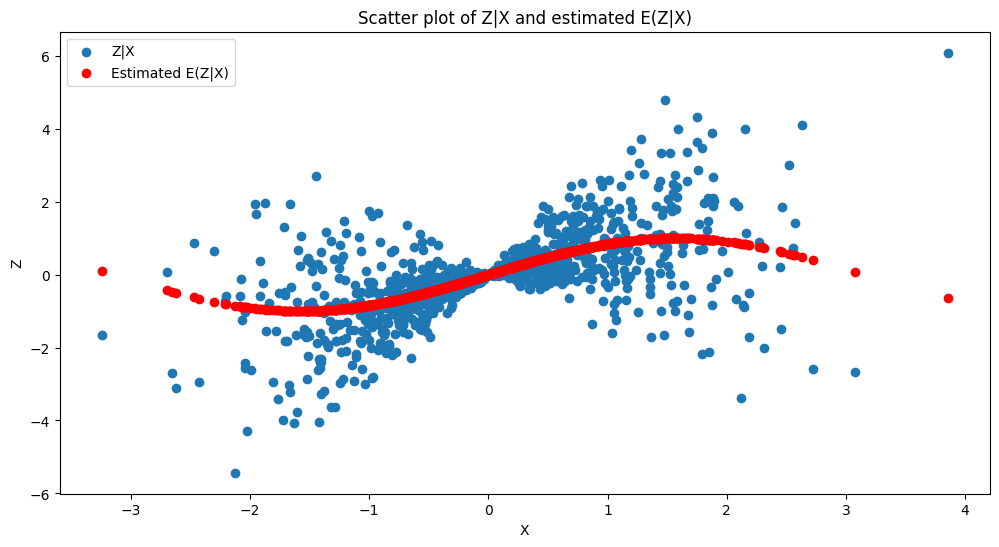

In [47]:
np.random.seed(42)
n_samples = 1000
X = np.random.normal(0, 1, n_samples)
Y = np.random.normal(0, 1, n_samples)
# Obliczanie Z = XY + sin(X)
Z = X * Y + np.sin(X)
# Obliczanie estymowanej wartości oczekiwanej warunkowej Z dla danej wartości X
estimated_Z_conditional_mean = np.sin(X)
# Rysowanie wykresu
plt.figure(figsize=(12,6))
plt.scatter(X, Z, label='Z|X')
plt.scatter(X, estimated_Z_conditional_mean, color='red', label='Estimated E(Z|X)')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Scatter plot of Z|X and estimated E(Z|X)')
plt.legend()
plt.show()

* **Analiza wykresu**
Na rysunku powyżej przedstawiono wykres rozrzutu zmiennej $Z$ względem $X$, przedstawiona jako czerwona linia, ukazuje oczekiwane wartości $Z$ dla poszczególnych wartości $X$. Rzeczywiste wartości $Z$ rozpraszają się wokół tej linii, co wskazuje na poprawność estymacji.

# Proces Poissona z Parametrem $T = 1$

* **Opis kodu**
Kod generuje realizacje procesu Poissona dla parametru $\lambda =10$ oraz rysuje wykres zależności $E(N_t|N_T)$ w czasie $t$.

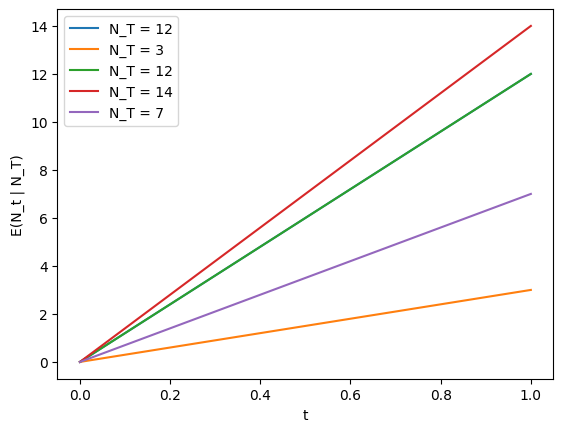

In [50]:
# Parametry procesu Poissona
T = 1
lambda_poisson = 10
n_realizations = 5
n_samples = 100

# Generowanie realizacji procesu Poissona
Nt_realizations = []
for _ in range(n_realizations):
    N_T = np.random.poisson(lambda_poisson * T)
    Nt_realizations.append(N_T)

# Ustalanie czasu t
t_values = np.linspace(0, T, n_samples)

# Wykres
for N_T in Nt_realizations:
    E_Nt_given_NT = (t_values / T) * N_T
    plt.plot(t_values, E_Nt_given_NT, label=f'N_T = {N_T}')

plt.xlabel('t')
plt.ylabel('E(N_t | N_T)')
plt.legend()
plt.show()


* **Analiza wykresu**
Na rysunku 2 przedstawiono wykres wartości oczekiwanej $E(N_t|N_T)$ dla różnych realizacji procesu Poissona. Linie pokazują różne trajektorie procesu, a nachylenie każdej z nich zależy od wartości $N_T$. Wartość oczekiwana rośnie liniowo z czasem $t$, co jest zgodne z teoretycznymi właściwościami procesu Poissona.

# Proces Poissona dla Interwału $s = 1$ do $t = 2$

* **Opis kodu**
Kod generuje realizacje procesu Poissona dla parametru $\lambda=10$ na przedziale od $s=1$ do $t=2$, a następnie rysuje wykres $E(N_t|F_s)$.

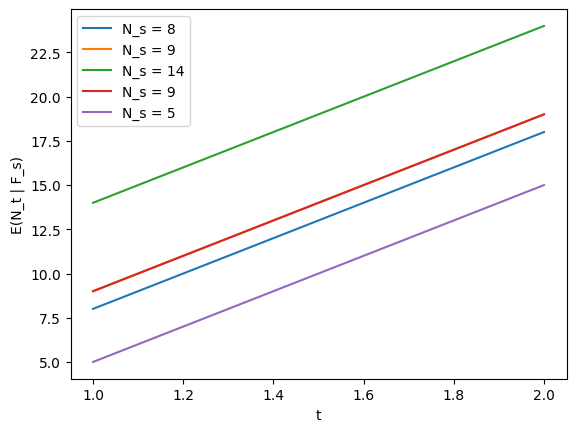

In [51]:
# Parametry procesu Poissona
lambda_poisson = 10
s = 1
t_values = np.linspace(1, 2, 100)
n_trajectories = 5

# Generowanie trajektorii do czasu s
Ns_realizations = np.random.poisson(lambda_poisson * s, n_trajectories)

# Wykres
for Ns in Ns_realizations:
    E_Nt_given_Fs = Ns + lambda_poisson * (t_values - s)
    plt.plot(t_values, E_Nt_given_Fs, label=f'N_s = {Ns}')

plt.xlabel('t')
plt.ylabel('E(N_t | F_s)')
plt.legend()
plt.show()

* **Analiza wykresu**
Na rysunku 3 przedstawiono wykres wartości oczekiwanej $E(N_t|F_s)$ dla różnych realizacji procesu Poissona. Wartość oczekiwana rośnie liniowo z czasem $t$, począwszy od wartości $N_s$ przy czasie $s=1$. Trajektorie są równoległe, co wskazuje na stałą intensywność procesu $\lambda$.

---

# Wnioski
Przeprowadzone symulacje oraz wykresy dostarczają następujących wniosków:
* Estymacja wartości oczekiwanej $E(Z|X)$ jako $\sin(X)$ jest dobrze odwzorowana na wykresie rozrzutu, co sugeruje poprawność przyjętego modelu.
* Wartość oczekiwana $E(N_t|N_T)$ dla procesu Poissona rośnie liniowo z czasem $t$, co jest zgodne z teoretycznymi przewidywaniami.
* Analiza procesu Poissona na przedziale $s=1$ do $t=2$ pokazuje, że wartość oczekiwana $E(N_t|F_s)$ rośnie liniowo z czasem, przy czym wszystkie trajektorie mają to samo nachylenie, zgodnie ze stałą intensywnością procesu $\lambda=10$.

# **Zadanie 5**
---

# Wstęp 
Zadanie polega na analizie prawdopodobieństwa ruiny w modelu Craméra-Lundberga, zdefiniowanym przez proces:
$$X_t = u + ct - \sum_{i=0}^{N_t}\xi_i,$$
gdzie $t,c,u \ge 0, \xi_i \sim \text{Exp}(\eta),\xi_i \perp \xi_j\ dla\ i \ne j, E(\xi_i)=\eta, \text{a} N_t$ jest procesem Poissona o intesnywności $\lambda$. Czas ruiny klasycznej jest dany przez:
$$\tau = \text{inf}\{t> 0|X_t< 0\}.$$
Prawdopodobieństwo ruiny w czasie nieskończonym jest oznaczone jako:
$$\psi(u,c) = P(\tau<\infty).$$
Wzór Pollaczka-Chinczyna mówi, że:
$$\xi(u,c) = \frac{\eta \lambda}{c} e^{-(\frac{1}{\eta}-\frac{\lambda}{c})u}.$$

Niniejszy raport weryfikuje wyniki analityczne za pomocą symulacji oraz rozszerza analizę, aby znaleźć wymaganą stawkę składki $c$ dla danego początkowego kapitału $u$ i prawdopodobieństwa $\psi$

# Symulacja i Weryfikacja Analityczna

Kod symuluje prawdopodobieństwo ruiny dla różnych wartości początkowego kapitału $u$ i porównuje je z wynikami analitycznymi zgodnie z wzorem Polaczka-Chinczyna.

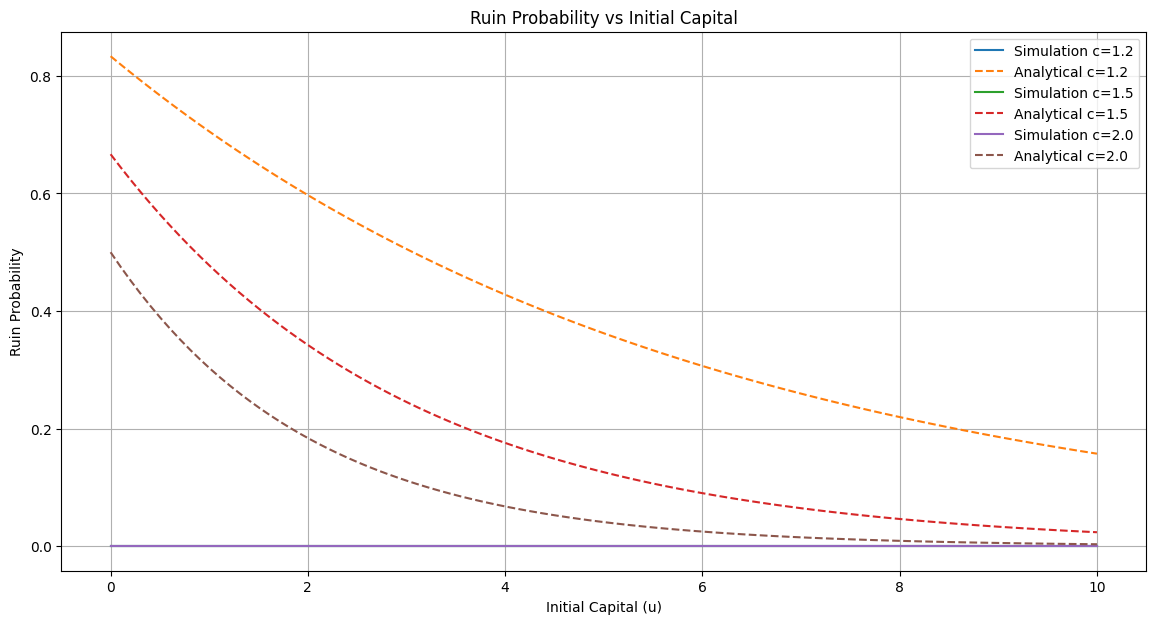

In [56]:
# Parametry symulacji
u_values = np.linspace(0, 10, 100)
c_values = [1.2, 1.5, 2.0]
lambda_value = 1.0
eta = 1.0
T = 10000  # Duży czas, aby przybliżyć nieskończoność
num_simulations = 10000

def simulate_ruin_probability(u, c, lambda_value, eta, T, num_simulations):
    ruin_counts = np.zeros_like(u)
    
    for i, initial_capital in enumerate(u):
        for _ in range(num_simulations):
            Nt = np.random.poisson(lambda_value * T)
            claims = np.random.exponential(eta, Nt)
            X_t = initial_capital + c * T - np.sum(claims)
            if X_t < 0:
                ruin_counts[i] += 1
    
    return ruin_counts / num_simulations

# Prawdopodobieństwo ruiny analityczne
def analytical_ruin_probability(u, c, lambda_value, eta):
    return (eta * lambda_value / c) * np.exp(-(1/eta - lambda_value/c) * u)

# Symulacja
ruin_probabilities = {}
for c in c_values:
    ruin_probabilities[c] = simulate_ruin_probability(u_values, c, lambda_value, eta, T, num_simulations)

# Obliczenia analityczne
analytical_probabilities = {}
for c in c_values:
    analytical_probabilities[c] = analytical_ruin_probability(u_values, c, lambda_value, eta)

# Wykresy
plt.figure(figsize=(14, 7))
for c in c_values:
    plt.plot(u_values, ruin_probabilities[c], label=f'Simulation c={c}')
    plt.plot(u_values, analytical_probabilities[c], '--', label=f'Analytical c={c}')

plt.xlabel('Initial Capital (u)')
plt.ylabel('Ruin Probability')
plt.title('Ruin Probability vs Initial Capital')
plt.legend()
plt.grid(True)
plt.show()

* **Analiza wykresu**
Funkcja symulacji oblicza prawdopodobieństwo ruiny poprzez przeprowadzenie wielu symulacji dla każdej wartości początkowego kapitału i zliczanie przypadków ruiny.
Wykres przedstawia prawdopodobieństwa ruiny uzyskane z symulacji i porównuje je z wynikami analitycznymi dla różnych wartości $c$. Bliskie dopasowanie wyników symulacji i analitycznych potwierdza poprawność wzoru Polačik-Chinczyna.

* **Analiza odwrotnej funckji $c$**
Kod analizuje również funkcję odwrotną $c(u,\psi)$, która określa wymaganą stawkę składki dla danego początkowego kapitału i żądanego prawdopodobieństwa ruiny. Funkcja odwrotna jest określona wzorem:
$$c(u,\psi) = \frac{\lambda u}{W_0(\frac{u\psi \frac{u}{\eta}}{\eta}),}$$
gdzie $W_0$ to gałąź funkcji $W$ Lamberta zdefiniowana poprzez równanie $W_0(xe^x)=x$ dla $x\ge 0.$ Wykres przedstawia wymaganą stawkę składki w zależności od początkowego kapitału dla różnych wartości $\psi$. Analiza pokazuje, jak stawka składki zmienia się wraz z kapitałem początkowym, aby osiągnąć określone prawdopodobieństwo ruiny.

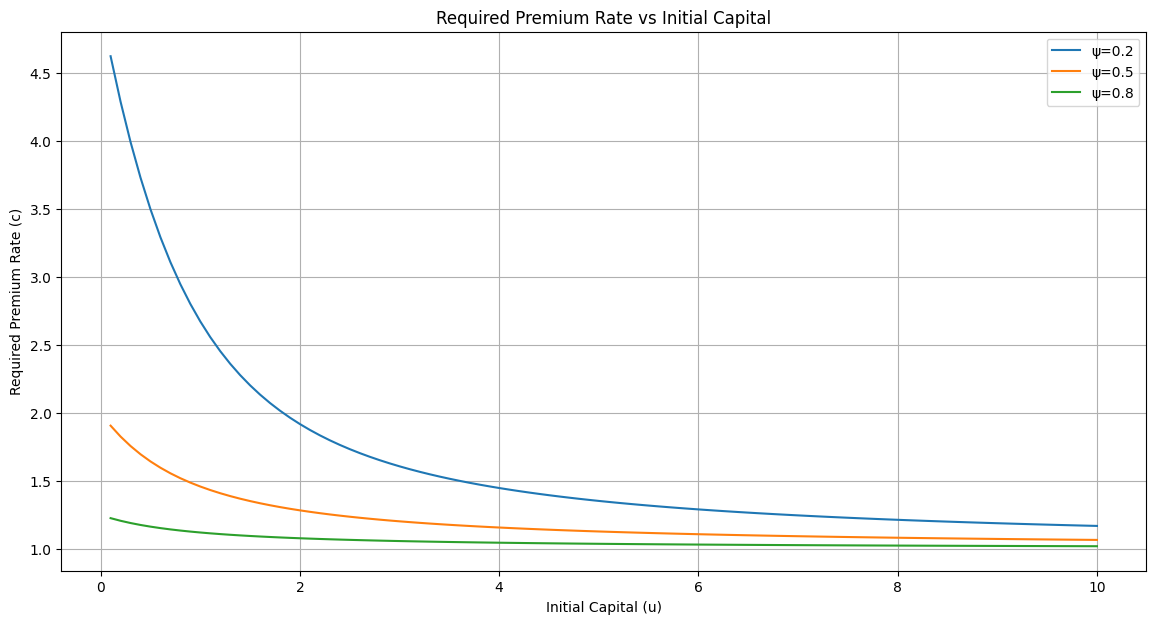

In [57]:
psi_values = [0.2, 0.5, 0.8]
u_values_for_c = np.linspace(0.1, 10, 100)

def inverse_c(u, psi, lambda_value, eta):
    return lambda_value * u / np.real(lambertw(u * psi * np.exp(u / eta) / eta))

# Symulacja odwrotna
inverse_c_values = {}
for psi in psi_values:
    inverse_c_values[psi] = [inverse_c(u, psi, lambda_value, eta) for u in u_values_for_c]

# Wykresy odwrotne
plt.figure(figsize=(14, 7))
for psi in psi_values:
    plt.plot(u_values_for_c, inverse_c_values[psi], label=f'ψ={psi}')

plt.xlabel('Initial Capital (u)')
plt.ylabel('Required Premium Rate (c)')
plt.title('Required Premium Rate vs Initial Capital')
plt.legend()
plt.grid(True)
plt.show()

# Wnioski
Przeprowadzona analiza i symulacje potwierdzają poprawność wzoru Pollaczka-Chinczyna dla prawdopodobieństwa ruiny w modelu Craméra-Lundberga. Dodatkowo, analiza funkcji odwrotnej pozwala na określenie wymaganej stawki składki dla danego kapitału początkowego i żądanego prawdopodobieństwa ruiny. Wyniki te mogą być użyteczne w praktycznych zastosowaniach, takich jak wycena składek ubezpieczeniowych.

# **Zadanie 6**
---

# Wstęp
Ciągła zmienna losowa $X$ ma rozkład arcsinusowy $(X\sim \text{Arcsine}(x))$, gdy jej funkcja gęstości prawdopodobieństwa $f(x)$ ma postać:
$$f(x) = \frac{1}{\pi\sqrt{x(1-x)}}\mathbb{1}_{(0,1)}(x)$$
Dystrybuanta tej zmiennej jest wtedy równa:
$$
		F_X(x) = \begin{cases}
			0 & \text{dla } x < 0 \\
			\frac{2}{\pi} \arcsin\left( \sqrt{x} \right) & \text{dla } x \in [0, 1] \\
			1 & \text{dla } x > 1
		\end{cases}
		
$$
Prawo arcsina sinus dla procesu Wienera $W_t$ brzmi następująco:

# Opis praw
1. **Pierwsze prawo**:
$$T_+ = \lambda \left( \{ t \in [0, 1] \, | \, W_t > 0 \} \right) \sim \text{Arcsine}$$
gdzie $\lambda$ to miara Lebesgue’a. Oznacza to, że czas spędzony przez proces Wienera powyżej osi $OX$ na odcinku $[0,1]$ ma rozkład arcsina sinusa.

2. **Drugie prawo**:
$$L = \sup \{ t \in [0, 1] \, | \, W_t = 0 \} \sim \text{Arcsine}$$
Inaczej mówiąc, ostatni moment uderzenia procesu Wienera na odcinku $[0,1]$ w oś $OX$ ma rozkład arcusa sinusa.

3. **Trzecie prawo**:
Niech $M$ będzie liczbą spełniającą
$$M = \sup \{ W_t \, | \, t \in [0, 1] \}$$
Wtedy:
$$M\sim\text{Arcsine}$$
Oznacza to, że moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku $[0,1]$ ma rozkład arcusa sinusa.


---

# Implementacja kodu

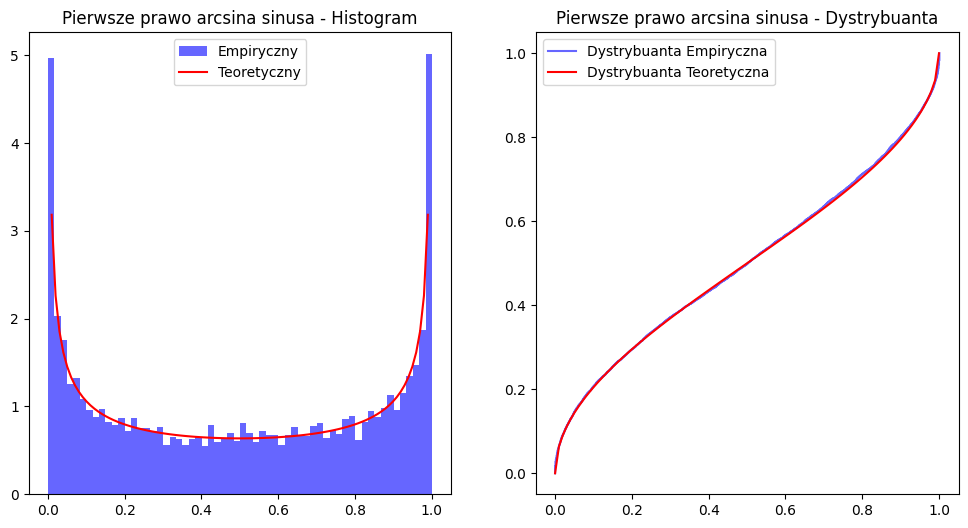

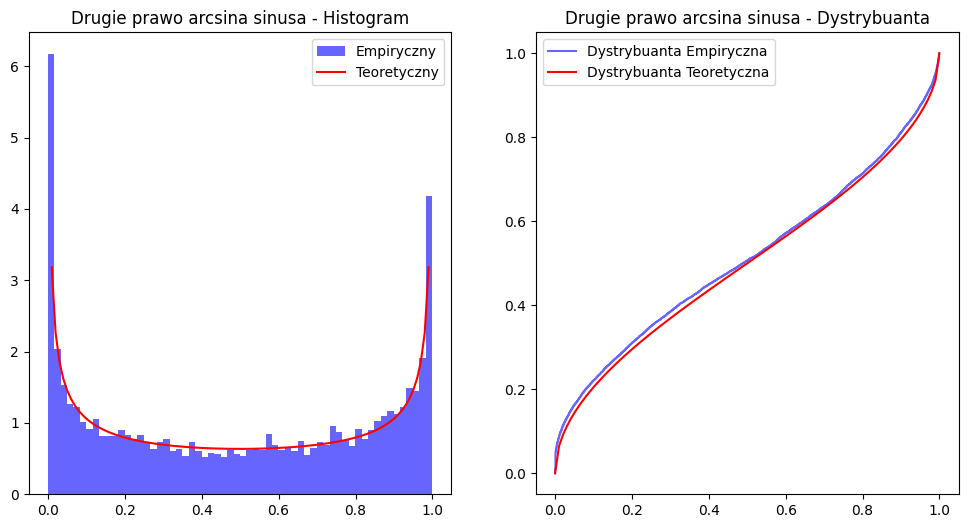

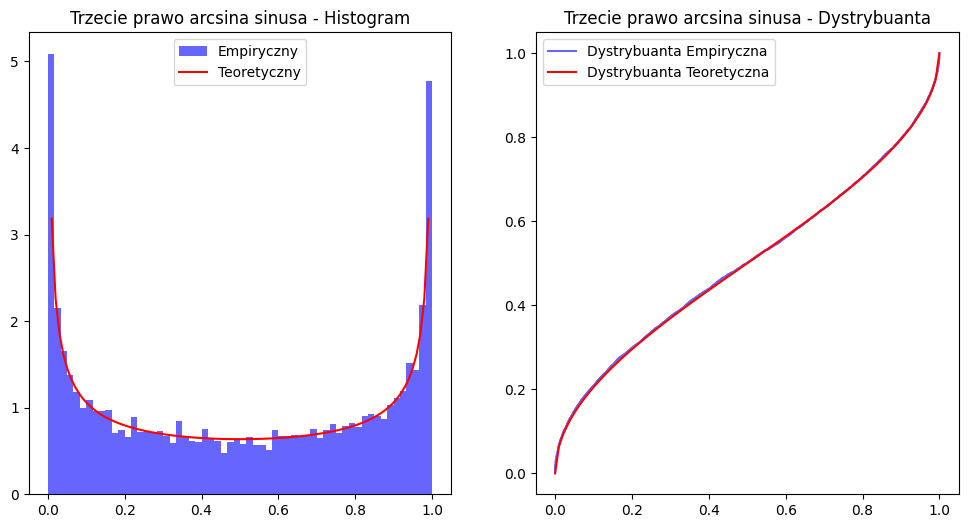

In [59]:
# Parametry symulacji
n_simulations = 10000  # Liczba symulacji
n_steps = 1000  # Liczba kroków w każdej symulacji
t = np.linspace(0, 1, n_steps)  # Przedział czasu od 0 do 1
dt = t[1] - t[0]  # Krok czasu

# Funkcja do symulacji procesu Wienera
def simulate_wiener_process(n_simulations, n_steps, dt):
    dW = np.sqrt(dt) * np.random.randn(n_simulations, n_steps)
    W = np.cumsum(dW, axis=1)
    return W

W = simulate_wiener_process(n_simulations, n_steps, dt)
T_plus = np.sum(W > 0, axis=1) * dt
L = np.array([np.max(np.where(np.diff(np.sign(W[i])) != 0)) if np.any(np.diff(np.sign(W[i])) != 0) else 1 for i in range(n_simulations)]) * dt
A = np.argmax(W, axis=1) * dt

x = np.linspace(0, 1, 100)

# Helper function to plot empirical CDF
def plot_empirical_cdf(ax, data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data) + 1) / float(len(sorted_data))
    ax.plot(sorted_data, yvals, color=color, label=label, alpha=0.6)

# Pierwsze prawo arcsina sinusa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(T_plus, bins=60, density=True, alpha=0.6, color='b', label='Empiryczny')
axs[0].plot(x, arcsine.pdf(x), 'r-', label='Teoretyczny')
axs[0].set_title('Pierwsze prawo arcsina sinusa - Histogram')
axs[0].legend()

plot_empirical_cdf(axs[1], T_plus, 'Dystrybuanta Empiryczna', 'b')
axs[1].plot(x, arcsine.cdf(x), 'r-', label='Dystrybuanta Teoretyczna')
axs[1].set_title('Pierwsze prawo arcsina sinusa - Dystrybuanta')
axs[1].legend()

plt.show()

# Drugie prawo arcsina sinusa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(L, bins=60, density=True, alpha=0.6, color='b', label='Empiryczny')
axs[0].plot(x, arcsine.pdf(x), 'r-', label='Teoretyczny')
axs[0].set_title('Drugie prawo arcsina sinusa - Histogram')
axs[0].legend()

plot_empirical_cdf(axs[1], L, 'Dystrybuanta Empiryczna', 'b')
axs[1].plot(x, arcsine.cdf(x), 'r-', label='Dystrybuanta Teoretyczna')
axs[1].set_title('Drugie prawo arcsina sinusa - Dystrybuanta')
axs[1].legend()

plt.show()

# Trzecie prawo arcsina sinusa
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(A, bins=60, density=True, alpha=0.6, color='b', label='Empiryczny')
axs[0].plot(x, arcsine.pdf(x), 'r-', label='Teoretyczny')
axs[0].set_title('Trzecie prawo arcsina sinusa - Histogram')
axs[0].legend()

plot_empirical_cdf(axs[1], A, 'Dystrybuanta Empiryczna', 'b')
axs[1].plot(x, arcsine.cdf(x), 'r-', label='Dystrybuanta Teoretyczna')
axs[1].set_title('Trzecie prawo arcsina sinusa - Dystrybuanta')
axs[1].legend()

plt.show()

---

# Analiza
W wyniku symulacji dla każdego z praw arcsina sinusa porównano histogramy empiryczne z teoretycznymi rozkładami oraz dystrybuanty empiryczne z teoretycznymi dystrybuantami rozkładu arcsina sinusa. Każdy z wykresów przedstawia dane empiryczne uzyskane z symulacji 10000 realizacji procesu Wienera.

# Podsumowanie
Na podstawie przeprowadzonych symulacji można stwierdzić, że empiryczne rozkłady i dystrybuanty czasu spędzonego powyżej osi $OX$, ostatniego momentu uderzenia osi $OX$ oraz momentu osiągnięcia maksymalnej wartości przez proces Wienera dobrze odpowiadają teoretycznym rozkładom arcsina sinusa. Wyniki te potwierdzają prawdziwość praw arcsina sinusa dla procesu Wienera. 

---